# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings , gc, time
from contextlib import contextmanager

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
%matplotlib inline
from pylab import rcParams
import warnings
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(style = "darkgrid")

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '0_EDA.ipynb',
 '1_FeatureSelection.ipynb',
 '2_model de scoring.ipynb',
 'ancien',
 'dashboard_p7',
 'data',
 'function_utils.py',
 'Implémentez un modèle de scoring.pptx',
 'Untitled.ipynb',
 '__pycache__']

In [4]:
os.listdir('data/source')

['application_test.csv',
 'application_test_light.csv',
 'application_train.csv',
 'application_train_light.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'Projet+Mise+en+prod+-+home-credit-default-risk.zip',
 'sample_submission.csv']

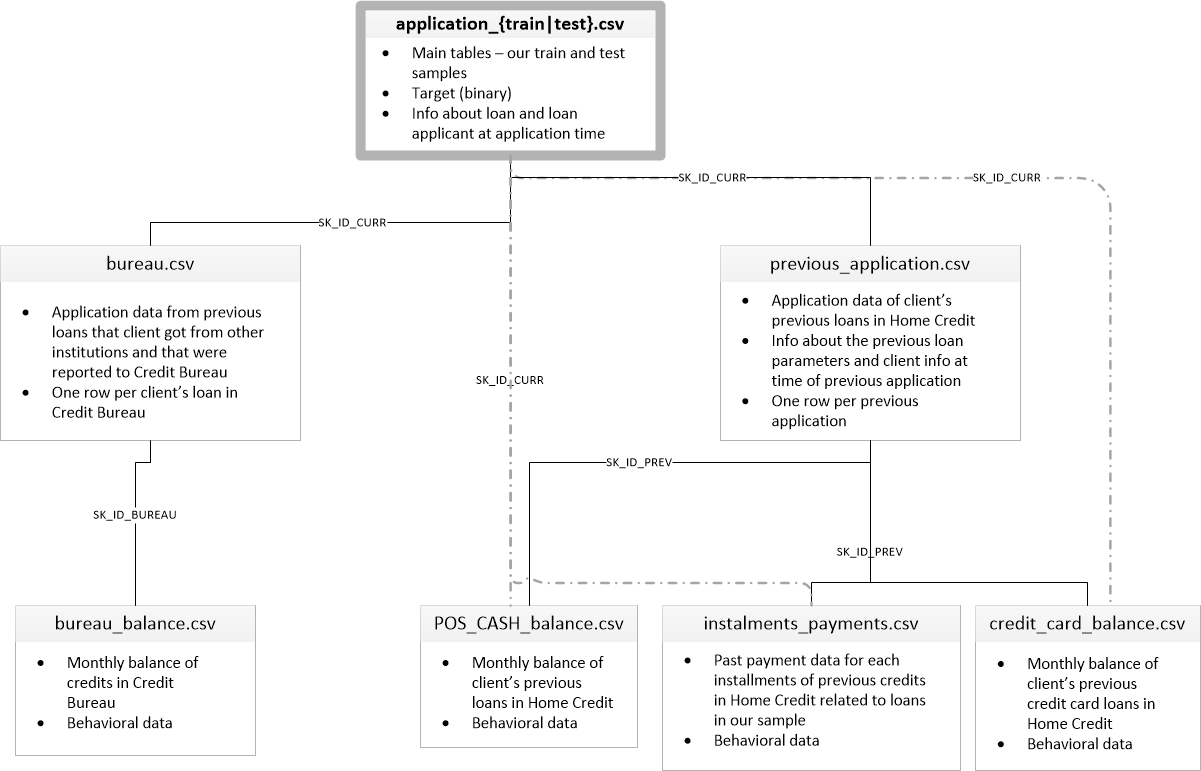

* ## application_{train|test}.csv

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

* ## bureau.csv

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

* ## bureau_balance.csv

Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .
    
* ## POS_CASH_balance.csv

Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

* ## credit_card_balance.csv

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

* ## previous_application.csv

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

* ## installments_payments.csv

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

* ## AccueilCredit_columns_description.csv

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [5]:
path = 'data/source/'
# A completer
filename_apptrain = 'application_train.csv'
filename_apptest = 'application_test.csv'

filename_bureau = 'bureau.csv'
filename_bureau_balance = 'bureau_balance.csv'
filename_ccbalance = 'credit_card_balance.csv'
filename_prevapp = 'previous_application.csv'
filename_POS_CASH_bal = 'POS_CASH_balance.csv'
filename_instpay = 'installments_payments.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [6]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv(path+'application_train.csv', nrows= num_rows)
    test_df = pd.read_csv(path+'application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(path+'bureau.csv', nrows = num_rows)
    bb = pd.read_csv(path+'bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(path+'previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(path+'POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(path+'installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(path+'credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg


debug = None
num_rows = 10000 if debug else None
df = application_train_test(num_rows)
with timer("Process bureau and bureau_balance"):
    bureau = bureau_and_balance(num_rows)
    print("Bureau df shape:", bureau.shape)
    df = df.join(bureau, how='left', on='SK_ID_CURR')
    del bureau
    gc.collect()
with timer("Process previous_applications"):
    prev = previous_applications(num_rows)
    print("Previous applications df shape:", prev.shape)
    df = df.join(prev, how='left', on='SK_ID_CURR')
    del prev
    gc.collect()
with timer("Process POS-CASH balance"):
    pos = pos_cash(num_rows)
    print("Pos-cash balance df shape:", pos.shape)
    df = df.join(pos, how='left', on='SK_ID_CURR')
    del pos
    gc.collect()
with timer("Process installments payments"):
    ins = installments_payments(num_rows)
    print("Installments payments df shape:", ins.shape)
    df = df.join(ins, how='left', on='SK_ID_CURR')
    del ins
    gc.collect()
with timer("Process credit card balance"):
    cc = credit_card_balance(num_rows)
    print("Credit card balance df shape:", cc.shape)
    df = df.join(cc, how='left', on='SK_ID_CURR')
    del cc
    gc.collect()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 15s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 8s
Installments payments df shape: (339587, 26)
Process installments payments - done in 21s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 11s


In [7]:
df.shape

(356251, 798)

In [8]:
train_df = df[df['TARGET'].notnull()].drop(columns = ['index'])
test_df = df[df['TARGET'].isnull()].drop(columns = ['TARGET'])
del df
gc.collect()

0

In [9]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
application_train_test    function     <function application_tra<...>st at 0x000001A2D1DCDF70>
bureau_and_balance        function     <function bureau_and_bala<...>ce at 0x000001A2D1DCDEE0>
contextmanager            function     <function contextmanager at 0x000001A2C792F4C0>
credit_card_balance       function     <function credit_card_bal<...>ce at 0x000001A2D1DF75E0>
debug                     NoneType     None
filename_POS_CASH_bal     str          POS_CASH_balance.csv
filename_apptest          str          application_test.csv
filename_apptrain         str          application_train.csv
filename_bureau           str          bureau.csv
filename_bureau_balance   str          bureau_balance.csv
filename_ccbalance        str          credit_card_balance.csv
filename_instpay          str          installments_payments.csv
filename_prevapp          str          previous_application.csv
gc   

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [10]:
train_df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_df.tail()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
307506,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307510,456255,0.0,1,0,1,0,157500.0,675000.0,49117.5,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_df.sample(5)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
252609,392295,0.0,1,0,0,0,225000.0,1280794.5,42457.5,1147500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109842,227391,0.0,1,0,0,0,225000.0,808650.0,23773.5,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245273,383865,0.0,1,0,0,0,157500.0,679266.0,20799.0,567000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
66437,177045,1.0,0,0,1,1,126000.0,199080.0,13432.5,157500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19079,122252,0.0,1,0,1,1,157500.0,640080.0,31261.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test_df.sample(5)

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
336403,28892,310568,1,1,1,0,67500.0,180000.0,9189.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324802,17291,225302,1,0,1,0,280800.0,1456920.0,101529.0,1350000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307615,104,100777,0,1,0,1,360000.0,1024740.0,52452.0,900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327972,20461,248461,1,1,0,2,135000.0,104256.0,9558.0,90000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331369,23858,273595,1,0,1,1,202500.0,525735.0,48348.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Columns: 797 entries, SK_ID_CURR to CC_COUNT
dtypes: float64(622), int64(42), uint8(133)
memory usage: 1.6 GB


In [15]:
train_df.dtypes.value_counts()

float64    622
uint8      133
int64       42
dtype: int64

In [16]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
train_df.nunique()

SK_ID_CURR                                                               307507
TARGET                                                                        2
CODE_GENDER                                                                   2
FLAG_OWN_CAR                                                                  2
FLAG_OWN_REALTY                                                               2
CNT_CHILDREN                                                                 15
AMT_INCOME_TOTAL                                                           2548
AMT_CREDIT                                                                 5603
AMT_ANNUITY                                                               13672
AMT_GOODS_PRICE                                                            1002
REGION_POPULATION_RELATIVE                                                   81
DAYS_BIRTH                                                                17460
DAYS_EMPLOYED                           

## Suppression des variables ne possedant qu'une seul valeur

In [17]:
col_uniq_to_drop = train_df.columns[(train_df.nunique()==1)]

In [18]:
train_df.drop(columns=col_uniq_to_drop,inplace=True)

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [19]:
print("Il y a {} lignes dupliquées".format(train_df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [20]:
print("Il y a {} lignes dupliquées".format( train_df.duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( train_df.reset_index()["SK_ID_CURR"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

In [21]:
train_df.apply(lambda x: np.sum(x=="XNA"))

SK_ID_CURR                                                               0
TARGET                                                                   0
CODE_GENDER                                                              0
FLAG_OWN_CAR                                                             0
FLAG_OWN_REALTY                                                          0
CNT_CHILDREN                                                             0
AMT_INCOME_TOTAL                                                         0
AMT_CREDIT                                                               0
AMT_ANNUITY                                                              0
AMT_GOODS_PRICE                                                          0
REGION_POPULATION_RELATIVE                                               0
DAYS_BIRTH                                                               0
DAYS_EMPLOYED                                                            0
DAYS_REGISTRATION        

In [22]:
colna = dict()
for col in train_df.columns:
    if any(train_df[col]=='XNA'):
        print(col,' : {} nombre de Xna'.format( np.sum(train_df[col]=='XNA') ))
    

In [23]:
#suppression des modalités XNA
train_df = train_df.loc[train_df.CODE_GENDER != 'XNA']
train_df[train_df=='XNA']=np.nan

In [24]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(train_df)
except:
    print('some errors!!!!');

some errors!!!!


In [25]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for col in data.columns:
        valeurs[col] = []
        valeurs[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        valeurs[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [26]:
# Modification directe de l'attribut
pd.options.display.max_columns = None
pd.options.display.max_rows = None
compute_nb_mising_values(train_df)

,Taux de valeurs non nulles,Nombre de valeurs manquantes
SK_ID_CURR,100.00,0
OCCUPATION_TYPE_Private service staff,100.00,0
OCCUPATION_TYPE_Realty agents,100.00,0
OCCUPATION_TYPE_Sales staff,100.00,0
OCCUPATION_TYPE_Secretaries,100.00,0
OCCUPATION_TYPE_Security staff,100.00,0
OCCUPATION_TYPE_Waiters/barmen staff,100.00,0
WEEKDAY_APPR_PROCESS_START_FRIDAY,100.00,0
WEEKDAY_APPR_PROCESS_START_MONDAY,100.00,0
WEEKDAY_APPR_PROCESS_START_SATURDAY,100.00,0


<Axes: >

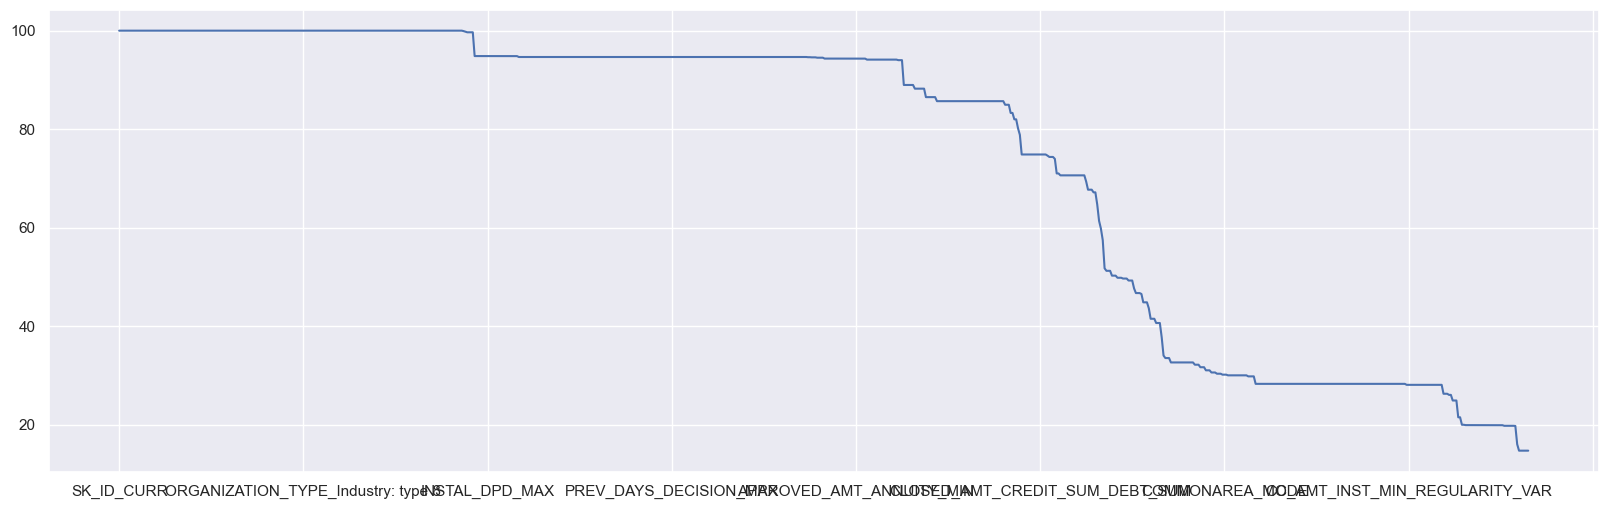

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(20, 6))
compute_nb_mising_values(train_df)['Taux de valeurs non nulles'].plot(ax= axes)

In [28]:
# Remplacement de NA des variable catégorielle par Xna
df_cleaned = train_df.copy()

In [29]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [30]:
nbColsupp = len(drop_NA_columns(df_cleaned,p=0.22))
print(drop_NA_columns(df_cleaned,p=0.20),'\n\n Au total cela représente', nbColsupp, 
      'colonnes. Soit {:.2%} du nombre de colonnes total'.format(nbColsupp/len(train_df.columns))
     )

del nbColsupp

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       ...
       'CC_NAME_CONTRACT_STATUS_Sent proposal_MAX',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_SUM',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_VAR',
       'CC_NAME_CONTRACT_STATUS_Signed_MIN',
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_COUNT'],
      dtype='object', length=277) 

 Au total cela représente 276 colonnes. Soit 36.03% du nombre de colonnes total


#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de 20% des valeurs sont manquantes </font></div>

In [31]:
col_to_drop = drop_NA_columns(df_cleaned,p=0.22).tolist()

#col_to_drop.remove("OCCUPATION_TYPE") 
col_to_drop.extend(["HOUR_APPR_PROCESS_START"])
df_cleaned.shape

(307507, 766)

In [32]:
df_cleaned = df_cleaned.drop(columns=col_to_drop,inplace=False)
test_df.drop(columns=col_to_drop,inplace=True)
df_cleaned.shape

(307507, 489)

In [33]:
col_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'BURO_DAYS_CREDIT_VAR',
 'BURO_AMT_CR

In [34]:
#les variables misc_data
try:
    import missingno as msno
    msno.bar(df_cleaned);
except:
    print('Some ERRORS when visualization!!!')

Some ERRORS when visualization!!!


#### <font color='teal'>3.3.c Suppressiuon des observations possedant trop de variables manquantes</font>

In [35]:
print( "Combien de client possedant plus de 5% de valeurs manquantes:",
      ((df_cleaned.isna().sum(axis=1)/df_cleaned.shape[0])>0.05).sum()
     )

Combien de client possedant plus de 5% de valeurs manquantes: 0


In [36]:
df_cleaned.shape

(307507, 489)

In [37]:
mask = (df_cleaned.isna().sum(axis=1)/df_cleaned.shape[0])>0.05
print('Nous observons {} clients très mals renseignés'.format(np.sum(mask)))
df_cleaned = df_cleaned.loc[~mask,:]
df_cleaned.shape
del mask

Nous observons 0 clients très mals renseignés


### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

#### <font color='teal'> - 3.4.1 Data target categorielle</font>

In [38]:
pd.DataFrame({'Effectif' : df_cleaned['TARGET'].value_counts(),
              'Effectif en %' : df_cleaned['TARGET'].value_counts(normalize = True).round(2), # renvoie la distribution en %
             }
            )

,Effectif,Effectif en %
0.0,282682,0.92
1.0,24825,0.08


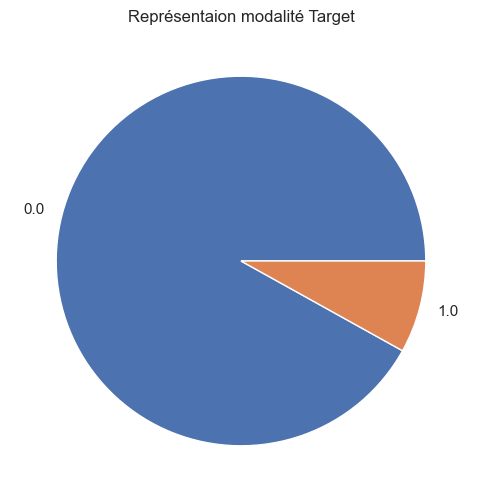

In [39]:
# diagramme en  Camembert
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(12, 6))

axes.set_title('Représentaion modalité Target')
df_cleaned['TARGET'].value_counts().plot(kind='pie',ax =  axes,label = '')
axes.xaxis.label.set_color('red')

In [40]:
df_cleaned['TARGET'].describe()

count    307507.00000
mean          0.08073
std           0.27242
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: TARGET, dtype: float64

# <a name="C4"><font color='green'>**Partie 4 : Feature Selection**</font></a> 

In [41]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#metrics
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score

# feature selection
from sklearn.feature_selection import mutual_info_classif, SequentialFeatureSelector

# Main algorithme
from lightgbm import LGBMClassifier as lgbmc
from sklearn.model_selection import KFold, StratifiedKFold

### <a name="C41"><font color='green'>4.1 Create X & y</font></a> 

In [42]:
X = df_cleaned.drop(columns = ['TARGET','SK_ID_CURR'])
y = df_cleaned['TARGET']#.values

# random Feature
# import random
# X['random'] = [random.randint(0, 1000) for i in range(X.shape[0])]

X.shape , y.shape

#X = df_cleaned.dropna().drop(columns = ['TARGET'])
#y = df_cleaned.dropna()['TARGET']#.values

((307507, 487), (307507,))

In [43]:
# Combien de valeur inf peut-on retrouver dans le dataframe
print('Combien de valeur "inf" dans notre dataframe :',X.apply(lambda x: (x==np.inf).sum() ).sum() )

Combien de valeur "inf" dans notre dataframe : 19


In [44]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

### <a name="C42"><font color='green'>4.2 Train Test Split</font></a> 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35, stratify = y)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=95, stratify = y_test)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )
print("Notre dataset de validation est une matrice au format {} et la cible {}".format(X_validation.shape,y_validation.shape) )
print('\n')
print("Notre dataset d'entrainement est une matrice {} et la cible {} dont {:.2%} de valeur 1".format(X_train.shape,y_train.shape, y_train.mean()))
print("Notre dataset de test est une matrice au format {} et la cible {} dont {:.2%} de valeur 1".format(X_test.shape,y_test.shape, y_test.mean()) )
print("Notre dataset de validation est une matrice au format {} et la cible {} dont {:.2%} de valeur 1".format(X_validation.shape,y_validation.shape, y_validation.mean()) )

Notre dataset d'entrainement est une matrice (184504, 487) et la cible (184504,)
Notre dataset de test est une matrice au format (61501, 487) et la cible (61501,)
Notre dataset de validation est une matrice au format (61502, 487) et la cible (61502,)


Notre dataset d'entrainement est une matrice (184504, 487) et la cible (184504,) dont 8.07% de valeur 1
Notre dataset de test est une matrice au format (61501, 487) et la cible (61501,) dont 8.07% de valeur 1
Notre dataset de validation est une matrice au format (61502, 487) et la cible (61502,) dont 8.07% de valeur 1


### <a name="C43"><font color='green'>4.3 Imputing & Scaling DataSet</font>

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Imputer
imp = SimpleImputer(strategy='mean')
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)
X_validation_imputed = imp.transform(X_validation)

# Scaler
scaler = StandardScaler().fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
X_validation_scaled = scaler.transform(X_validation_imputed)

### <a name="C44"><font color='green'>4.4 Feature importance</font>

#### <font color='green'>4.4.1 Feature importance based on mean decrease in impurity LightGBMc</font>

In [47]:
#feature_names = [f"feature {i}" for i in scaler.get_feature_names_out() ]
feature_names = [i for i in imp.get_feature_names_out() ]
lightGBc = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')
lightGBc.fit(X_train_scaled, y_train)

LGBMClassifier(class_weight='balanced', objective='binary', random_state=0)

In [48]:
start_time = time.time()
importances = lightGBc.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.000 seconds


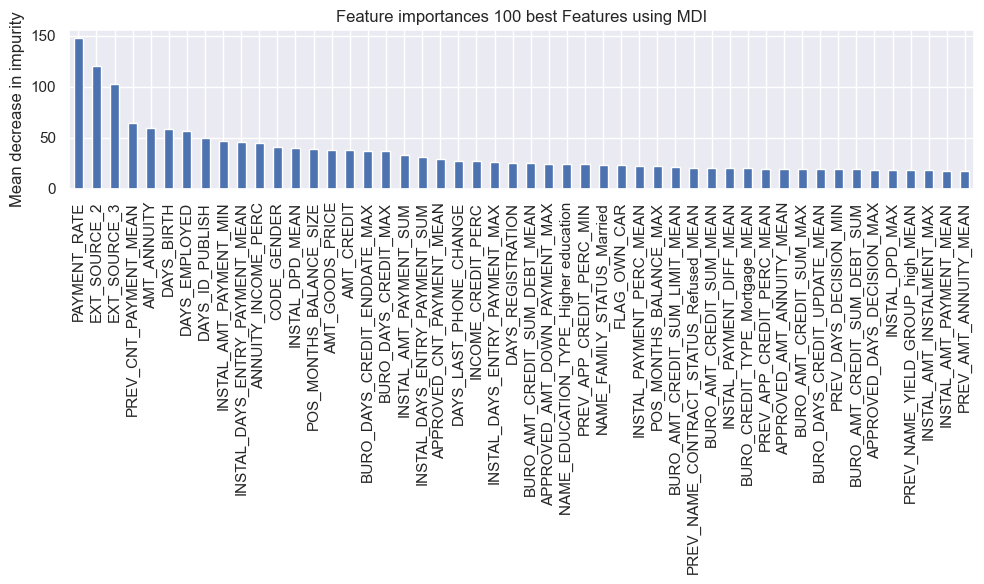

In [49]:
lightGb_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:50]

fig, ax = plt.subplots()
lightGb_importances.plot.bar( ax=ax)#yerr=std,
ax.set_title("Feature importances 100 best Features using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### <font color='green'>4.4.2 Sequential Feature Selection LightGBMC</font>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 487 out of 487 | elapsed:  1.9min finished

[2023-09-12 11:00:16] Features: 1/20 -- score: 0.6234377674023052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.3min finished

[2023-09-12 11:02:36] Features: 2/20 -- score: 0.6562037771772123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   42.0s

Selected Features: ('AMT_GOODS_PRICE', 'FLAG_MOBIL', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'ORGANIZATION_TYPE_Industry: type 4', 'HOUSETYPE_MODE_terraced house', 'DAYS_EMPLOYED_PERC', 'PAYMENT_RATE', 'BURO_CREDIT_CURRENCY_currency 4_MEAN', 'APPROVED_AMT_CREDIT_MIN', 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MEAN')
acc_balanced: 0.6885731324780862



[2023-09-12 12:00:44] Features: 20/20 -- score: 0.6885731324780862

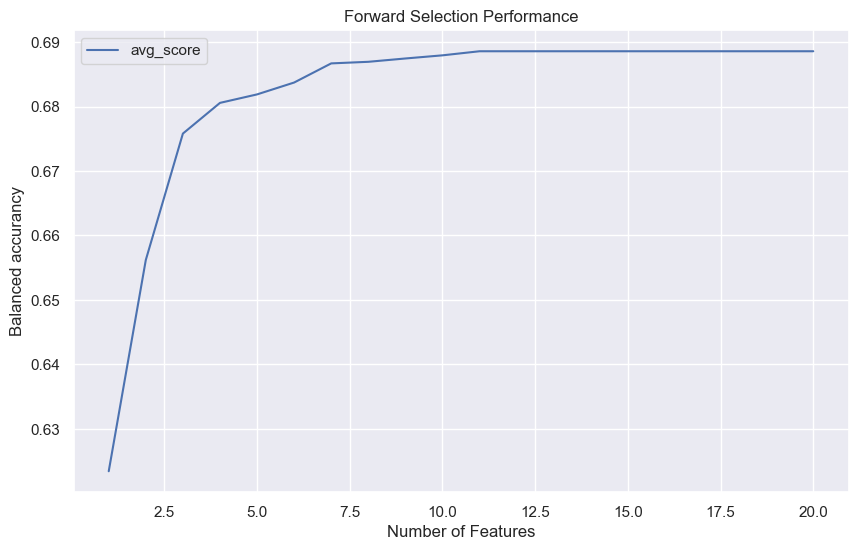

CPU times: total: 12min 2s
Wall time: 1h 2min 21s


In [50]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs_mlxtend = SFS(lightGBc,k_features=20,forward=True,
                  floating=False,
                  scoring='balanced_accuracy',
                  cv=3, verbose=2, n_jobs=-1)
sfs_mlxtend.fit(pd.DataFrame(X_train_scaled,columns=imp.get_feature_names_out()), y_train)

# Print the selected features
print("Selected Features:", sfs_mlxtend.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
score = sfs_mlxtend.k_score_
print("acc_balanced:", score)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs_mlxtend.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Balanced accurancy")
ax.set_title("Forward Selection Performance")
plt.show()

In [51]:
sfs_mlxtend.subsets_[1]

{'feature_idx': (198,),
 'cv_scores': array([0.62192991, 0.62249727, 0.62588612]),
 'avg_score': 0.6234377674023052,
 'feature_names': ('PAYMENT_RATE',)}

In [113]:
addlist, acc_mean = list(), list()
for i in range(len(sfs_mlxtend.subsets_)):
    new = sfs_mlxtend.subsets_[i+1]['feature_names'] 
    for elt in new:
        if elt not in addlist:
            addlist.append( elt )
            acc_mean.append( sfs_mlxtend.subsets_[i+1]['avg_score'] )
            continue
            
# show 
amelioration = pd.DataFrame(acc_mean,index=addlist, columns=['score_acc'])
amelioration['delta_accuracy'] = amelioration - amelioration.shift()
amelioration.sort_values(['score_acc'], ascending = True)

,score_acc,delta_accuracy
PAYMENT_RATE,0.623438,NaN
EXT_SOURCE_2,0.656204,0.032766
EXT_SOURCE_3,0.675805,0.019601
DAYS_EMPLOYED_PERC,0.680565,0.004760
INSTAL_DPD_MEAN,0.681881,0.001316
AMT_GOODS_PRICE,0.683723,0.001841
BURO_CREDIT_CURRENCY_currency 4_MEAN,0.686690,0.002968
ORGANIZATION_TYPE_Industry: type 4,0.686936,0.000246
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,0.687452,0.000516
HOUSETYPE_MODE_terraced house,0.687939,0.000487


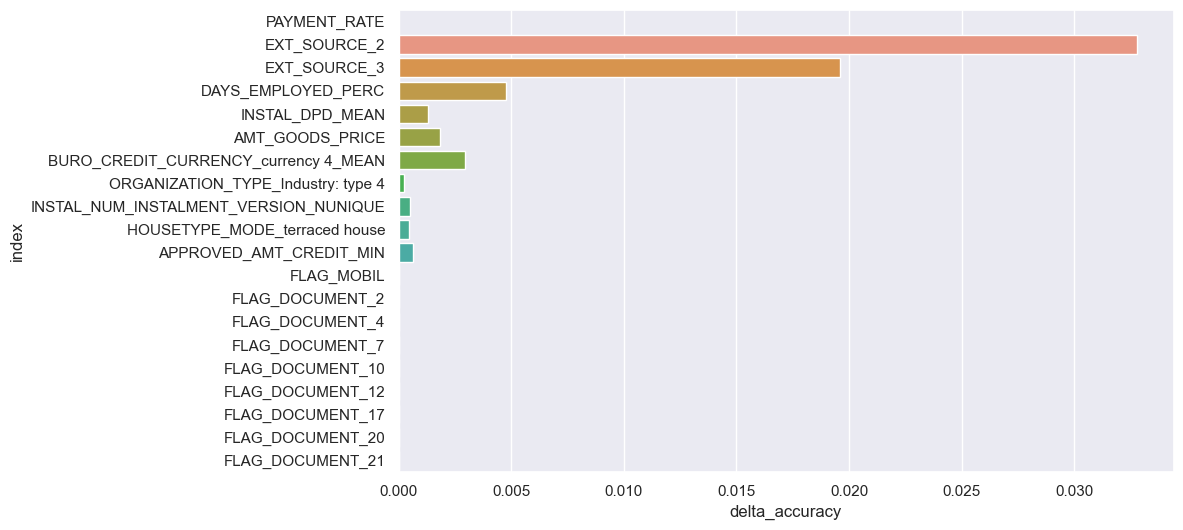

In [112]:
sns.barplot(data=amelioration.sort_values(['score_acc'], ascending = True).reset_index(), 
            x='delta_accuracy',y='index');

## sfs Fbeta score

- Besoin
    Nous supposon que le coût d’un FN est dix fois supérieur au coût d’un FP
    fonction à minimiser => f: 10FN + FP 

In [149]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=np.sqrt(10))

In [185]:
[elt for i, elt in enumerate(imp.get_feature_names_out()) if i in (28,29,194,198,463)]

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED_PERC',
 'PAYMENT_RATE',
 'INSTAL_DPD_MEAN']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 482 out of 482 | elapsed:  2.9min finished

[2023-09-14 16:04:47] Features: 6/16 -- score: 0.5210326081616784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 481 out of 481 | elapsed:  2.9min finished

[2023-09-14 16:07:43] Features: 7/16 -- score: 0.5223397984829656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.2s

Selected Features: ('CODE_GENDER', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Industry: type 6', 'DAYS_EMPLOYED_PERC', 'PAYMENT_RATE', 'BURO_CREDIT_TYPE_Another type of loan_MEAN', 'PREV_NAME_PORTFOLIO_POS_MEAN', 'PREV_CHANNEL_TYPE_Stone_MEAN', 'INSTAL_DPD_MEAN')
fbeta=√10 :  0.5277269354610031



[2023-09-14 16:39:51] Features: 16/16 -- score: 0.5277269354610031

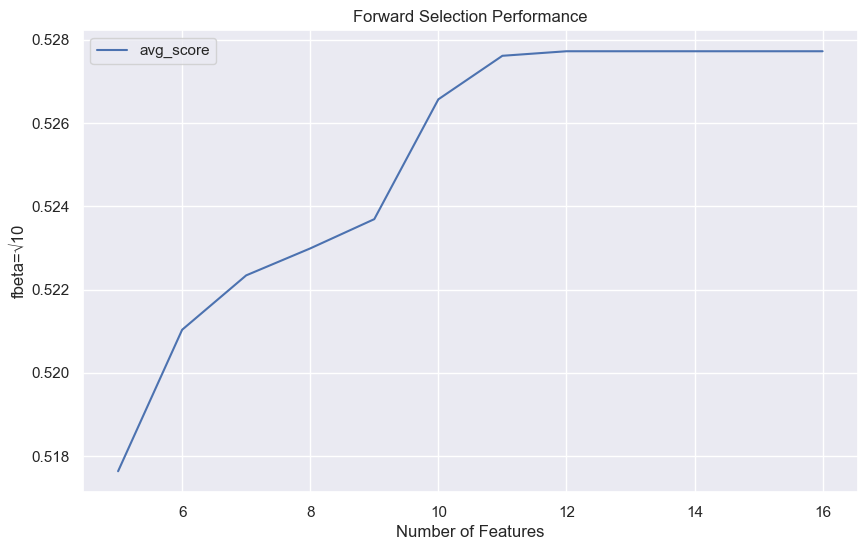

CPU times: total: 5min 58s
Wall time: 37min 57s


In [186]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs_mlxtendf1 = SFS(lightGBc,k_features=16,forward=True,
                  floating=False,
                  scoring=ftwo_scorer,fixed_features=(28,29,194,198,463),
                  cv=3, verbose=2, n_jobs=-1)
sfs_mlxtendf1.fit(pd.DataFrame(X_train_scaled,columns=imp.get_feature_names_out()), y_train)

# Print the selected features
print("Selected Features:", sfs_mlxtendf1.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
scoref1 = sfs_mlxtendf1.k_score_
print("fbeta=√10 : ", scoref1)

# Plot the performance of the model with different feature subsets
sfs_df_f1 = pd.DataFrame.from_dict(sfs_mlxtendf1.get_metric_dict()).T
sfs_df_f1["avg_score"] = sfs_df_f1["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df_f1.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("fbeta=√10")
ax.set_title("Forward Selection Performance")
plt.show()

In [199]:
addlist_f1, acc_mean_f1 = list(), list()
debut = 5
for i in range(len(sfs_mlxtendf1.subsets_)):
    new = sfs_mlxtendf1.subsets_[i+debut]['feature_names'] 
    for elt in new:
        if elt not in addlist_f1:
            addlist_f1.append( elt )
            acc_mean_f1.append( sfs_mlxtendf1.subsets_[i+debut]['avg_score'] )
            continue
            
# show 
amelioration_f1 = pd.DataFrame(acc_mean_f1,index=addlist_f1, columns=['score_f1'])
amelioration_f1['delta_f1'] = amelioration_f1 - amelioration_f1.shift()
amelioration_f1.sort_values(['score_f1'], ascending = True)
del debut

<Axes: xlabel='delta_f1', ylabel='index'>

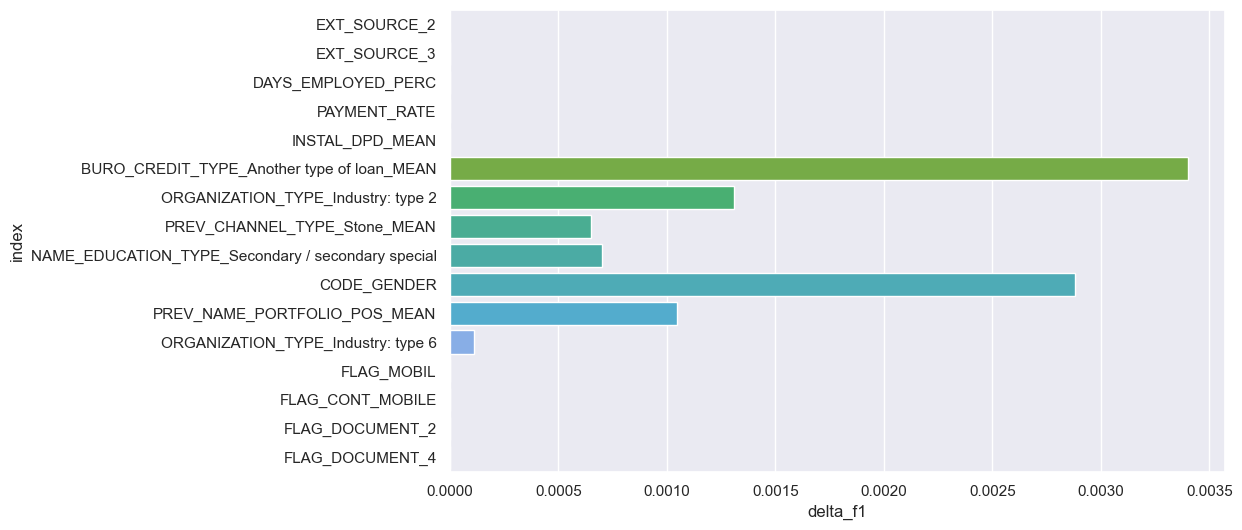

In [200]:
sns.barplot(data=amelioration_f1.sort_values(['score_f1'], ascending = True).reset_index(), x='delta_f1',y='index')

### Prolonger la feature selection SFS en conservant les features selectionnées

### La liste de colonne à converser

In [123]:
# add selected feature balanced accuracy
col_a_conserver = list(set(sfs_mlxtend.subsets_.get(11)['feature_names'] ) )#list(set(sfs_mlxtendprol.k_feature_names_ ) )
len(col_a_conserver)

11

In [124]:
col_a_conserver

['AMT_GOODS_PRICE',
 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
 'ORGANIZATION_TYPE_Industry: type 4',
 'INSTAL_DPD_MEAN',
 'EXT_SOURCE_2',
 'BURO_CREDIT_CURRENCY_currency 4_MEAN',
 'APPROVED_AMT_CREDIT_MIN',
 'PAYMENT_RATE',
 'HOUSETYPE_MODE_terraced house',
 'DAYS_EMPLOYED_PERC',
 'EXT_SOURCE_3']

In [56]:
df_cleaned[['TARGET']+col_a_conserver].corr().style.background_gradient()

,TARGET,AMT_GOODS_PRICE,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,ORGANIZATION_TYPE_Industry: type 4,INSTAL_DPD_MEAN,EXT_SOURCE_2,BURO_CREDIT_CURRENCY_currency 4_MEAN,APPROVED_AMT_CREDIT_MIN,PAYMENT_RATE,HOUSETYPE_MODE_terraced house,DAYS_EMPLOYED_PERC,EXT_SOURCE_3
TARGET,1.000000,-0.039647,-0.010274,0.004074,0.008903,-0.160471,-0.001444,-0.012733,0.012703,0.000982,-0.067952,-0.178926
AMT_GOODS_PRICE,-0.039647,1.000000,0.067120,-0.001534,-0.004249,0.139369,0.003456,0.117907,-0.533945,0.000796,0.070168,0.047709
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,-0.010274,0.067120,1.000000,0.002960,-0.001827,0.032544,-0.001295,0.025121,-0.031514,0.000881,0.017837,-0.000039
ORGANIZATION_TYPE_Industry: type 4,0.004074,-0.001534,0.002960,1.000000,-0.001818,-0.002901,-0.000268,0.001615,0.005967,-0.000444,-0.016488,-0.009298
INSTAL_DPD_MEAN,0.008903,-0.004249,-0.001827,-0.001818,1.000000,-0.005400,-0.000517,-0.015366,0.002959,0.004168,0.007650,-0.007641
EXT_SOURCE_2,-0.160471,0.139369,0.032544,-0.002901,-0.005400,1.000000,-0.002309,0.062725,-0.045898,0.000840,0.072163,0.109182
BURO_CREDIT_CURRENCY_currency 4_MEAN,-0.001444,0.003456,-0.001295,-0.000268,-0.000517,-0.002309,1.000000,-0.001231,-0.000921,-0.000316,-0.001992,0.003221
APPROVED_AMT_CREDIT_MIN,-0.012733,0.117907,0.025121,0.001615,-0.015366,0.062725,-0.001231,1.000000,-0.024301,-0.000109,-0.000622,0.014699
PAYMENT_RATE,0.012703,-0.533945,-0.031514,0.005967,0.002959,-0.045898,-0.000921,-0.024301,1.000000,-0.001470,-0.050985,-0.001277
HOUSETYPE_MODE_terraced house,0.000982,0.000796,0.000881,-0.000444,0.004168,0.000840,-0.000316,-0.000109,-0.001470,1.000000,-0.002872,0.000366


## Suppression des colonnes trop corrélés entre elles parmi les colonnes conservées

In [57]:
col_a_conserver.extend( ['SK_ID_CURR', 'TARGET'] )
col_a_conserver = list(set(col_a_conserver))
col_a_conserver

['SK_ID_CURR',
 'AMT_GOODS_PRICE',
 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
 'HOUSETYPE_MODE_terraced house',
 'INSTAL_DPD_MEAN',
 'ORGANIZATION_TYPE_Industry: type 4',
 'BURO_CREDIT_CURRENCY_currency 4_MEAN',
 'APPROVED_AMT_CREDIT_MIN',
 'PAYMENT_RATE',
 'TARGET',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED_PERC',
 'EXT_SOURCE_3']

In [59]:
colTemp = [col for col in col_a_conserver if col not in 'SK_ID_CURR']
df_cleaned[colTemp].isna().sum()/df_cleaned.shape[0]>0.2

AMT_GOODS_PRICE                          False
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE    False
HOUSETYPE_MODE_terraced house            False
INSTAL_DPD_MEAN                          False
ORGANIZATION_TYPE_Industry: type 4       False
BURO_CREDIT_CURRENCY_currency 4_MEAN     False
APPROVED_AMT_CREDIT_MIN                  False
PAYMENT_RATE                             False
TARGET                                   False
EXT_SOURCE_2                             False
DAYS_EMPLOYED_PERC                       False
EXT_SOURCE_3                             False
dtype: bool

In [60]:
del colTemp
gc.collect()

20021

In [61]:
import joblib
joblib.dump(col_a_conserver, "data/cleaned/SelectedFeaturesWithSFS.sav")

['data/cleaned/SelectedFeaturesWithSFS.sav']

### Avant suppression

In [62]:
from sklearn.model_selection import cross_val_score

In [67]:
lightGBc_Allfeature = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')

print("Les scores sont obtenus avec la concatenation des split de datasets nommés train et test\n")

print("Le score auc obtenu en conservant toutes les colonnes :",cross_val_score(lightGBc_Allfeature,
                X=X_train_scaled,
                y=y_train,
                cv = 5, n_jobs = -1, scoring = 'roc_auc' ).mean()
     )


print("Le balanced accuracy obtenu en conservant toutes les colonnes :",cross_val_score(lightGBc_Allfeature,
                X=X_train_scaled,
                y=y_train,
                cv = 5, n_jobs = -1, scoring = 'balanced_accuracy' ).mean()
     )

Les scores sont obtenus avec la concatenation des split de datasets nommés train et test

Le score auc obtenu en conservant toutes les colonnes : 0.7756844853400346
Le balanced accuracy obtenu en conservant toutes les colonnes : 0.7045666663206867


In [125]:
from sklearn.metrics import balanced_accuracy_score
lightGBc_Allfeature.fit(X_train_scaled, y_train)

print("Les scores obtenus sur des split dataset\n")

print(' score auc train set :',roc_auc_score(y_train, lightGBc_Allfeature.predict_proba(X_train_scaled)[:, 1]),'\n',
'score auc test set :',roc_auc_score(y_test, lightGBc_Allfeature.predict_proba(X_test_scaled)[:, 1]),'\n',
'score auc validation set :',roc_auc_score(y_validation, lightGBc_Allfeature.predict_proba(X_validation_scaled)[:, 1])
     )

print('\n')

print(' Ballanced accuracy score train set :',balanced_accuracy_score(y_train, lightGBc_Allfeature.predict(X_train_scaled)),'\n',
'Ballanced accuracy score test set :',balanced_accuracy_score(y_test, lightGBc_Allfeature.predict(X_test_scaled)),'\n',
'Ballanced accuracy score validation set :',balanced_accuracy_score(y_validation, lightGBc_Allfeature.predict(X_validation_scaled))
     )

print('\n')

print(' f1 score train set :',f1_score(y_train, lightGBc_Allfeature.predict(X_train_scaled)),'\n',
'f1 score test set :',f1_score(y_test, lightGBc_Allfeature.predict(X_test_scaled)),'\n',
'f1 score validation set :',f1_score(y_validation, lightGBc_Allfeature.predict(X_validation_scaled))
     )

Les scores obtenus sur des split dataset

 score auc train set : 0.8375576813658758 
 score auc test set : 0.7751035976898427 
 score auc validation set : 0.7687889585483157


 Ballanced accuracy score train set : 0.7558695110714836 
 Ballanced accuracy score test set : 0.7063233956501225 
 Ballanced accuracy score validation set : 0.7007578635463367


 f1 score train set : 0.3267369020501139 
 f1 score test set : 0.28889461921952897 
 f1 score validation set : 0.28434107196498304


[[41594 14942]
 [ 1604  3361]]


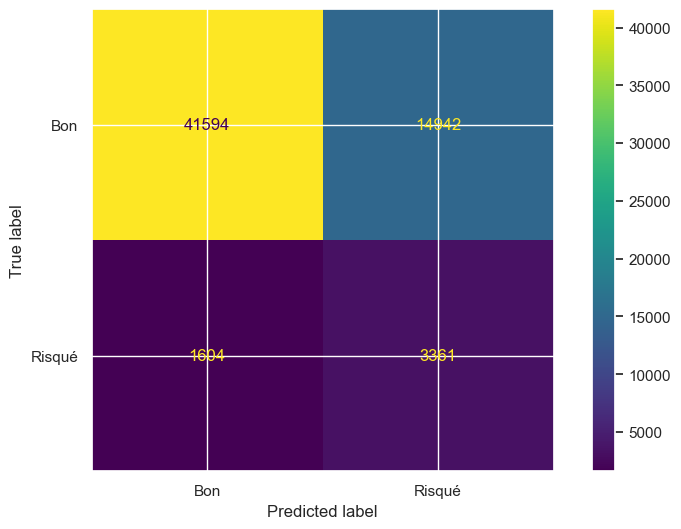

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=lightGBc_Allfeature.predict(X_test_scaled)
)
print(matrix_threshold)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix_threshold, display_labels = ["Bon", "Risqué"])
cm_display.plot()
plt.show()

In [ ]:
contrainte fonction à minimiser pas respecté car Nombre Fn 1604 * 10 > Nombre Fp 14942

### Après suppression SFS balanced accuracy

In [91]:
colToKeepX = [x for x in col_a_conserver]
colToKeepX.remove('SK_ID_CURR')
colToKeepX.remove('TARGET')
X_train_sfs = pd.DataFrame(X_train_scaled, columns=imp.get_feature_names_out())[colToKeepX]
X_test_sfs = pd.DataFrame(X_test_scaled, columns=imp.get_feature_names_out())[colToKeepX]
X_validation_sfs = pd.DataFrame(X_validation_scaled, columns=imp.get_feature_names_out())[colToKeepX]

In [96]:
lightGBc_SelectedFeature = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')
print("Le score auc obtenu en conservant les 11 meilleurs features :",#25
      cross_val_score(lightGBc_SelectedFeature,
                      X= X_train_sfs.values ,
                      y= y_train ,
                      cv = 5, n_jobs = -1, scoring = 'roc_auc').mean()
     )

print("Le balanced accuracy obtenu en conservant les 11 meilleurs features :",
      cross_val_score(lightGBc_SelectedFeature,
                      X= X_train_sfs.values ,
                      y= y_train ,
                      cv = 5, n_jobs = -1, scoring = 'balanced_accuracy' ).mean()
     )

Le score auc obtenu en conservant les 11 meilleurs features : 0.7495720725104249
Le balanced accuracy obtenu en conservant les 11 meilleurs features : 0.6864415941747644


In [126]:
lightGBc_SelectedFeature.fit(X_train_sfs.values, y_train)

print(' score auc train set :',roc_auc_score(y_train, 
                                             lightGBc_SelectedFeature.predict_proba(X_train_sfs.values)[:, 1]),'\n',
'score auc test set :',roc_auc_score(y_test, 
                                     lightGBc_SelectedFeature.predict_proba(X_test_sfs.values)[:, 1]),'\n',
'score auc validation set :',roc_auc_score(y_validation, 
                                           lightGBc_SelectedFeature.predict_proba(X_validation_sfs.values)[:, 1])
     )


print('\n')

print(' Ballanced accuracy score train set :',balanced_accuracy_score(y_train, 
                                                                      lightGBc_SelectedFeature.predict(X_train_sfs.values)),'\n',
'Ballanced accuracy score test set :',balanced_accuracy_score(y_test, 
                                                              lightGBc_SelectedFeature.predict(X_test_sfs.values)),'\n',
'Ballanced accuracy score validation set :',balanced_accuracy_score(y_validation, 
                                                                    lightGBc_SelectedFeature.predict(X_validation_sfs.values))
     )

print('\n')

print(' f1 score train set :',f1_score(y_train, lightGBc_SelectedFeature.predict(X_train_sfs.values)),'\n',
'f1 score test set :',f1_score(y_test, lightGBc_SelectedFeature.predict(X_test_sfs.values)),'\n',
'f1 score validation set :',f1_score(y_validation, lightGBc_SelectedFeature.predict(X_validation_sfs.values))
     )

 score auc train set : 0.7853645152307943 
 score auc test set : 0.7482863827035464 
 score auc validation set : 0.7435714112554085


 Ballanced accuracy score train set : 0.7112339052371448 
 Ballanced accuracy score test set : 0.6867561112305738 
 Ballanced accuracy score validation set : 0.677847938915351


 f1 score train set : 0.2816450716046792 
 f1 score test set : 0.26491589971437646 
 f1 score validation set : 0.2583508340928003


[[39632 16904]
 [ 1626  3339]]


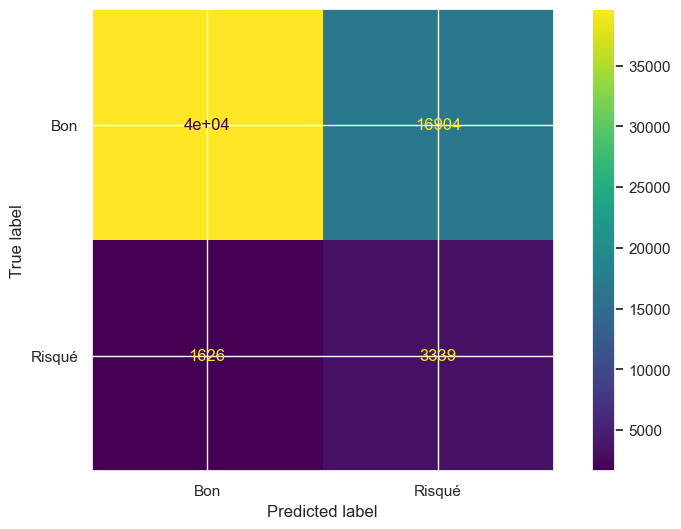

In [167]:
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=lightGBc_SelectedFeature.predict(X_test_sfs)
)
print(matrix_threshold)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix_threshold, display_labels = ["Bon", "Risqué"])
cm_display.plot()
plt.show()

In [ ]:
contrainte fonction à minimiser est respecté car Nombre Fn 1626 * 10 < Nombre Fp 16904

### Après suppression SFS fbeta √10 score

In [201]:
print("Dataset reduit F1")
X_train_sfsf1 = sfs_mlxtendf1.transform(X_train_scaled)[:,:12]
X_test_sfsf1 = sfs_mlxtendf1.transform(X_test_scaled)[:,:12]
X_validation_sfsf1 = sfs_mlxtendf1.transform(X_validation_scaled)[:,:12]

print(X_train_sfsf1.shape)

lightGBc_SelectedFeaturef1 = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')
lightGBc_SelectedFeaturef1.fit(X_train_sfsf1, y_train)

print(' score auc train set :',roc_auc_score(y_train, lightGBc_SelectedFeaturef1.predict_proba(X_train_sfsf1)[:, 1]),'\n',
'score auc test set :',roc_auc_score(y_test,lightGBc_SelectedFeaturef1.predict_proba(X_test_sfsf1)[:, 1]),'\n',
'score auc validation set :',roc_auc_score(y_validation, lightGBc_SelectedFeaturef1.predict_proba(X_validation_sfsf1)[:, 1])
     )


print('\n')

print(' Ballanced accuracy score train set :',balanced_accuracy_score(y_train, lightGBc_SelectedFeaturef1.predict(X_train_sfsf1)),'\n',
'Ballanced accuracy score test set :',balanced_accuracy_score(y_test, lightGBc_SelectedFeaturef1.predict(X_test_sfsf1)),'\n',
'Ballanced accuracy score validation set :',balanced_accuracy_score(y_validation, lightGBc_SelectedFeaturef1.predict(X_validation_sfsf1))
     )

print('\n')

print(' f1 score train set :',f1_score(y_train, lightGBc_SelectedFeaturef1.predict(X_train_sfsf1)),'\n',
'f1 score test set :',f1_score(y_test, lightGBc_SelectedFeaturef1.predict(X_test_sfsf1)),'\n',
'f1 score validation set :',f1_score(y_validation, lightGBc_SelectedFeaturef1.predict(X_validation_sfsf1))
     )

Dataset reduit F1
(184504, 12)
 score auc train set : 0.7783002596234554 
 score auc test set : 0.7488543940881771 
 score auc validation set : 0.7422750398410323


 Ballanced accuracy score train set : 0.703547236304777 
 Ballanced accuracy score test set : 0.6843483003495103 
 Ballanced accuracy score validation set : 0.6783916889190248


 f1 score train set : 0.27641335787536153 
 f1 score test set : 0.2626262626262626 
 f1 score validation set : 0.2585518250484439


[[39485 17051]
 [ 1637  3328]]


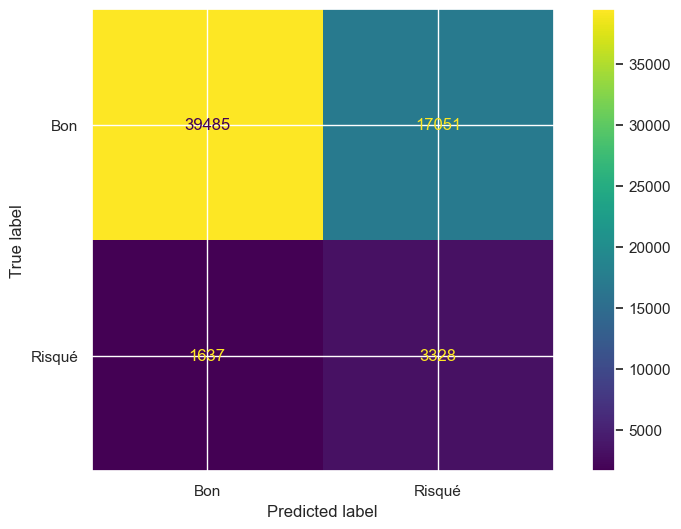

In [202]:
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=lightGBc_SelectedFeaturef1.predict(X_test_sfsf1)
)
print(matrix_threshold)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix_threshold, display_labels = ["Bon", "Risqué"])
cm_display.plot()
plt.show()

In [ ]:
contrainte fonction à minimiser est respecté car Nombre Fn 1637 * 10 < Nombre Fp 17051

In [100]:
import joblib
joblib.dump(lightGBc_Allfeature, "data/modeles sauvegardés/lightGBc_Allfeature.sav")

joblib.dump(sfs_mlxtend,"data/modeles sauvegardés/sfs_mlxtend.sav")
joblib.dump(lightGBc_SelectedFeature,"data/modeles sauvegardés/lightGBc_SFS_SelectedFeature.sav")

['data/modeles sauvegardés/lightGBc_SFS_SelectedFeature.sav']

## Data filtered features save

In [203]:
sfs_mlxtendf1.subsets_.get(12)['feature_names']

('CODE_GENDER',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'ORGANIZATION_TYPE_Industry: type 2',
 'ORGANIZATION_TYPE_Industry: type 6',
 'DAYS_EMPLOYED_PERC',
 'PAYMENT_RATE',
 'BURO_CREDIT_TYPE_Another type of loan_MEAN',
 'PREV_NAME_PORTFOLIO_POS_MEAN',
 'PREV_CHANNEL_TYPE_Stone_MEAN',
 'INSTAL_DPD_MEAN')

In [204]:
 col_a_conserver_balacc_fbeta = ['SK_ID_CURR','TARGET'] + list(set(list(sfs_mlxtend.subsets_.get(11)['feature_names'] ) + list(sfs_mlxtendf1.subsets_.get(12)['feature_names'] ) ))

In [205]:
train_df[col_a_conserver_balacc_fbeta].head()

,SK_ID_CURR,TARGET,ORGANIZATION_TYPE_Industry: type 6,AMT_GOODS_PRICE,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,PREV_NAME_PORTFOLIO_POS_MEAN,ORGANIZATION_TYPE_Industry: type 4,INSTAL_DPD_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,CODE_GENDER,EXT_SOURCE_2,PREV_CHANNEL_TYPE_Stone_MEAN,BURO_CREDIT_CURRENCY_currency 4_MEAN,APPROVED_AMT_CREDIT_MIN,PAYMENT_RATE,HOUSETYPE_MODE_terraced house,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_EMPLOYED_PERC,ORGANIZATION_TYPE_Industry: type 2,EXT_SOURCE_3
0,100002,1.0,0,351000.0,2.0,1.000000,0,0.000000,0.0,0,0.262949,1.000000,0.0,179055.0,0.060749,0,1,0.067329,0,0.139376
1,100003,0.0,0,1129500.0,2.0,0.666667,0,0.000000,0.0,1,0.622246,0.333333,0.0,68053.5,0.027598,0,0,0.070862,0,NaN
2,100004,0.0,0,135000.0,2.0,1.000000,0,0.000000,0.0,0,0.555912,0.000000,0.0,20106.0,0.050000,0,1,0.011814,0,0.729567
3,100006,0.0,0,297000.0,2.0,0.222222,0,0.000000,NaN,1,0.650442,0.111111,NaN,24219.0,0.094941,0,1,0.159905,0,NaN
4,100007,0.0,0,513000.0,2.0,0.333333,0,0.954545,0.0,0,0.322738,0.000000,0.0,14616.0,0.042623,0,1,0.152418,0,NaN


In [206]:
test_df[[x for x in col_a_conserver_balacc_fbeta if x != 'TARGET']].head()

,SK_ID_CURR,ORGANIZATION_TYPE_Industry: type 6,AMT_GOODS_PRICE,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,PREV_NAME_PORTFOLIO_POS_MEAN,ORGANIZATION_TYPE_Industry: type 4,INSTAL_DPD_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,CODE_GENDER,EXT_SOURCE_2,PREV_CHANNEL_TYPE_Stone_MEAN,BURO_CREDIT_CURRENCY_currency 4_MEAN,APPROVED_AMT_CREDIT_MIN,PAYMENT_RATE,HOUSETYPE_MODE_terraced house,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_EMPLOYED_PERC,ORGANIZATION_TYPE_Industry: type 2,EXT_SOURCE_3
307511,100001,0,450000.0,2.0,1.0,0,1.571429,0.0,1,0.789654,0.00,0.0,23787.0,0.036147,0,0,0.121044,0,0.159520
307512,100005,0,180000.0,2.0,0.5,0,0.111111,0.0,0,0.291656,0.00,0.0,40153.5,0.077973,0,1,0.247398,0,0.432962
307513,100013,0,630000.0,3.0,0.5,0,0.541935,0.0,0,0.699787,0.25,0.0,24232.5,0.105202,0,0,0.222477,0,0.610991
307514,100028,0,1575000.0,3.0,0.4,0,0.265487,0.0,1,0.509677,0.00,0.0,59521.5,0.031123,0,1,0.133515,0,0.612704
307515,100038,0,625500.0,1.0,0.5,0,0.000000,NaN,0,0.425687,0.00,NaN,92605.5,0.051266,0,1,0.168021,0,NaN


In [207]:
df_cleaned[col_a_conserver_balacc_fbeta].shape

(307507, 20)

In [208]:
df_cleaned[col_a_conserver_balacc_fbeta].corr().style.background_gradient()

,SK_ID_CURR,TARGET,ORGANIZATION_TYPE_Industry: type 6,AMT_GOODS_PRICE,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,PREV_NAME_PORTFOLIO_POS_MEAN,ORGANIZATION_TYPE_Industry: type 4,INSTAL_DPD_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,CODE_GENDER,EXT_SOURCE_2,PREV_CHANNEL_TYPE_Stone_MEAN,BURO_CREDIT_CURRENCY_currency 4_MEAN,APPROVED_AMT_CREDIT_MIN,PAYMENT_RATE,HOUSETYPE_MODE_terraced house,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_EMPLOYED_PERC,ORGANIZATION_TYPE_Industry: type 2,EXT_SOURCE_3
SK_ID_CURR,1.000000,-0.002111,0.000462,-0.000241,0.002596,-0.001244,-0.001808,0.000008,-0.000380,0.000735,0.002342,-0.000615,0.000745,0.000213,0.000317,0.000552,-0.001150,-0.000123,0.000330,0.000209
TARGET,-0.002111,1.000000,-0.000652,-0.039647,-0.010274,-0.034347,0.004074,0.008903,-0.001761,-0.054710,-0.160471,-0.021195,-0.001444,-0.012733,0.012703,0.000982,0.049822,-0.067952,-0.001230,-0.178926
ORGANIZATION_TYPE_Industry: type 6,0.000462,-0.000652,1.000000,-0.002620,0.000976,-0.002543,-0.001021,-0.001128,-0.000774,0.004407,0.001249,-0.003171,-0.000095,0.000086,0.001260,-0.001201,0.000548,-0.000871,-0.000737,-0.000371
AMT_GOODS_PRICE,-0.000241,-0.039647,-0.002620,1.000000,0.067120,0.007825,-0.001534,-0.004249,0.005358,-0.022512,0.139369,-0.011783,0.003456,0.117907,-0.533945,0.000796,-0.120646,0.070168,-0.001698,0.047709
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,0.002596,-0.010274,0.000976,0.067120,1.000000,-0.248589,0.002960,-0.001827,-0.003049,0.033376,0.032544,-0.097660,-0.001295,0.025121,-0.031514,0.000881,-0.013621,0.017837,0.000055,-0.000039
PREV_NAME_PORTFOLIO_POS_MEAN,-0.001244,-0.034347,-0.002543,0.007825,-0.248589,1.000000,0.003554,0.003911,-0.000075,-0.041747,-0.017758,0.362993,-0.000312,-0.153873,-0.005535,-0.001995,-0.032229,0.000654,0.004792,0.090071
ORGANIZATION_TYPE_Industry: type 4,-0.001808,0.004074,-0.001021,-0.001534,0.002960,0.003554,1.000000,-0.001818,0.000091,-0.016378,-0.002901,-0.004705,-0.000268,0.001615,0.005967,-0.000444,-0.000516,-0.016488,-0.002065,-0.009298
INSTAL_DPD_MEAN,0.000008,0.008903,-0.001128,-0.004249,-0.001827,0.003911,-0.001818,1.000000,-0.002034,-0.001200,-0.005400,0.009992,-0.000517,-0.015366,0.002959,0.004168,0.006351,0.007650,0.000571,-0.007641
BURO_CREDIT_TYPE_Another type of loan_MEAN,-0.000380,-0.001761,-0.000774,0.005358,-0.003049,-0.000075,0.000091,-0.002034,1.000000,-0.011897,0.002759,-0.001926,-0.000203,0.001366,0.000731,-0.001013,-0.007066,-0.004995,-0.001606,-0.016948
CODE_GENDER,0.000735,-0.054710,0.004407,-0.022512,0.033376,-0.041747,-0.016378,-0.001200,-0.011897,1.000000,0.014617,0.039576,-0.000082,-0.012641,-0.071913,0.001103,-0.004715,0.080747,-0.008628,0.023043


In [207]:
df_cleaned[col_a_conserver_balacc_fbeta].shape

(307507, 20)

In [209]:
import joblib
joblib.dump( train_df[col_a_conserver_balacc_fbeta], "data/cleaned/df_train_filtered.sav")
joblib.dump( test_df[[x for x in col_a_conserver_balacc_fbeta if x != 'TARGET']], "data/cleaned/df_test_filtered.sav")

['data/cleaned/df_test_filtered.sav']

# <a name="C5"><font color='blue'>**Partie 5 : MLflow**</font></a>

In [215]:
colToKeepX = [x for x in col_a_conserver_balacc_fbeta]
colToKeepX.remove('SK_ID_CURR')
colToKeepX.remove('TARGET')

X_train_sfs = pd.DataFrame(X_train_scaled, columns=imp.get_feature_names_out())[colToKeepX]
X_test_sfs = pd.DataFrame(X_test_scaled, columns=imp.get_feature_names_out())[colToKeepX]
X_validation_sfs = pd.DataFrame(X_validation_scaled, columns=imp.get_feature_names_out())[colToKeepX]

In [216]:
# Metrics
from sklearn.metrics import (roc_auc_score, f1_score, recall_score, 
                             accuracy_score, precision_score, ConfusionMatrixDisplay )

import mlflow

In [217]:
def eval_metrics(actual, pred, pred_proba):
    accuracy = balanced_accuracy_score(actual, pred)
    precision = precision_score(actual, pred )
    f1 = f1_score(actual, pred)
    recall = recall_score(actual, pred)
    auc = roc_auc_score(actual, pred_proba[:,1])
    return accuracy, precision, f1, recall, auc

In [218]:
from mlflow.models import infer_signature
signature_AllFeature = infer_signature(X_train_scaled, y_train)
signature_SelectedFeature = infer_signature(X_train_sfs, y_train)

In [219]:
# Définir où les Runs sont enregistrées local ou remote
mlflow.set_tracking_uri("data/mlflow/mlruns") 

# Définir l'expérience donnée comme l'expérience active.
# Définir un nom d'expérience, qui doit être unique et sensible à la casse.
# 'OC_projet_7' : path to experiment in remote workspace
mlflow.set_experiment('OC_projet_7') 

# Active (ou désactive) et configure l'autologisation pour les estimateurs scikit-learn.
mlflow.sklearn.autolog(exclusive=False)# Permet de faire appel à l'API de sklearn qui integre tous les algorithme de scikit-learn

accuracy : 0.7040757096908492 
precision: 0.17998721227621484 
f1: 0.2846669194792062 
recall: 0.6803625377643504 
auc: 0.7711183798021138


CPU times: total: 1min 42s
Wall time: 15.2 s


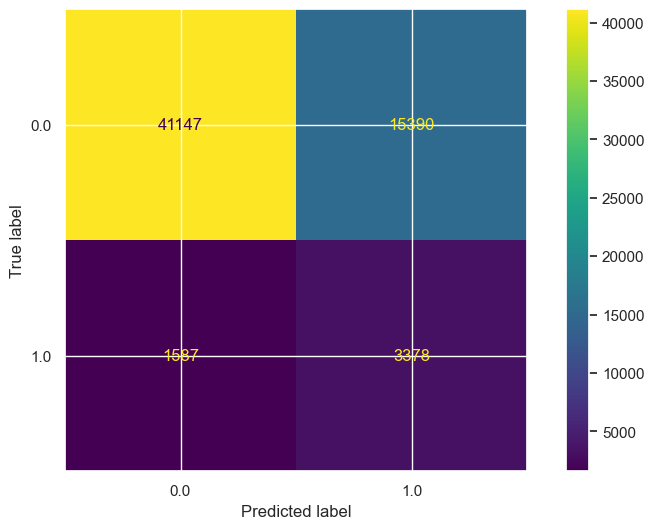

In [221]:
%%time
lightGBc_Allfeature = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')

# All Feature from all csv
with mlflow.start_run(run_name='LightGBMC ALL Feature_v2'): #experiment_id= experiment_id
    lightGBc_Allfeature.fit( np.concatenate((X_train_scaled,X_test_scaled), axis=0), np.concatenate((y_train,y_test), axis=0) )
    
    y_pred_proba = lightGBc_Allfeature.predict_proba(X_validation_scaled)
    y_pred = lightGBc_Allfeature.predict(X_validation_scaled)
    
    # Metrics
    accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
    print("accuracy : {0} \nprecision: {1} \nf1: {2} \nrecall: {3} \nauc: {4}".format(accuracy, precision, f1, recall, auc ))
    cm = ConfusionMatrixDisplay.from_predictions(y_true = y_validation, y_pred = y_pred)
    print("\n")
    # Log params
    # mlflow.log_param('max_iter' , '100')
    
    # Log metrics
    mlflow.log_metric("accuracy_test",accuracy)
    mlflow.log_metric('precision_test',precision)
    mlflow.log_metric("f1_test",f1)
    mlflow.log_metric("recall_test",recall)
    mlflow.log_metric("auc_test",auc)
    
    # Log figure
    mlflow.log_figure(cm.figure_, 'test_confusion_matrix.png')
    
    # Log model
    mlflow.sklearn.log_model(lightGBc_Allfeature, 'modele LightGBMc with all features', signature=signature_AllFeature)

accuracy : 0.6861950379757369 
precision: 0.1638702734432324 
f1: 0.2636964735516373 
recall: 0.67472306143001 
auc: 0.7495765937913627


CPU times: total: 10.5 s
Wall time: 3.41 s


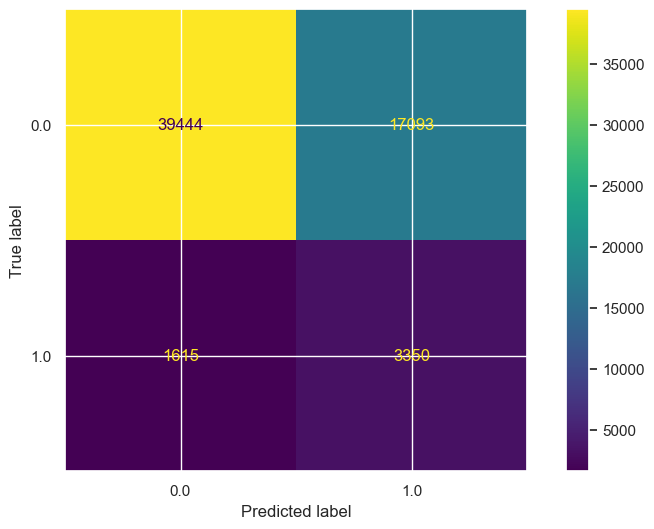

In [222]:
%%time

lightGBc_SelectedFeature = lgbmc(objective='binary',class_weight='balanced',random_state = 0,importance_type = 'split')

# Only Selected Feature from SFS
with mlflow.start_run(run_name='LightGBMC Selected Feature_v2'): #experiment_id= experiment_id
    lightGBc_SelectedFeature.fit(np.concatenate((X_train_sfs,X_test_sfs), axis=0), np.concatenate((y_train,y_test), axis=0) )
    
    y_pred_proba = lightGBc_SelectedFeature.predict_proba(X_validation_sfs)
    y_pred = lightGBc_SelectedFeature.predict(X_validation_sfs)
    
    # Metrics
    accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
    print("accuracy : {0} \nprecision: {1} \nf1: {2} \nrecall: {3} \nauc: {4}".format(accuracy, precision, f1, recall, auc ))
    cm = ConfusionMatrixDisplay.from_predictions(y_true = y_validation, y_pred = y_pred)
    print("\n")
    # Log params
    # mlflow.log_param('max_iter' , '100')
    
    # Log metrics
    mlflow.log_metric("accuracy_test",accuracy)
    mlflow.log_metric('precision_test',precision)
    mlflow.log_metric("f1_test",f1)
    mlflow.log_metric("recall_test",recall)
    mlflow.log_metric("auc_test",auc)
    
    # Log figure
    mlflow.log_figure(cm.figure_, 'test_confusion_matrix.png')
    
    # Log model
    mlflow.sklearn.log_model(lightGBc_SelectedFeature, 'modele LightGBMc with only selected features', signature=signature_SelectedFeature)

# <a name="C6"><font color='purple'>**Partie 6 : Handling Unbalanced Data**</font></a>

In [223]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV, GridSearchCV

### <a name="C51"><font color='purple'>5.1 SUR-ECHANTILLONNAGE</font></a> 

#### <a name="C511"><font color='purple'>5.1.1 SMOTENC</font></a> 

SMOTE pour Synthetic Minority Over-Sampling Technique consiste à sur-échantillonner en se basant sur les proches voisins de la classe minoritaire.

- D’abord, on choisit une observation de la classe minoritaire et on sélectionne aléatoirement un de ses proches  voisins appartenant à la même classe en utilisant la distance euclidienne (Étape b, Figure 2)

- Ensuite, on calcule la différence pour chaque feature et on la multiplie par un nombre aléatoire entre 0 et 1.
    
- Finalement, on ajoute le résultat à l’observation choisie pour obtenir un nouveau point (Étape c, Figure 2).

Le procédé est par la suite réitéré pour chaque point de données de la classe minoritaire. 

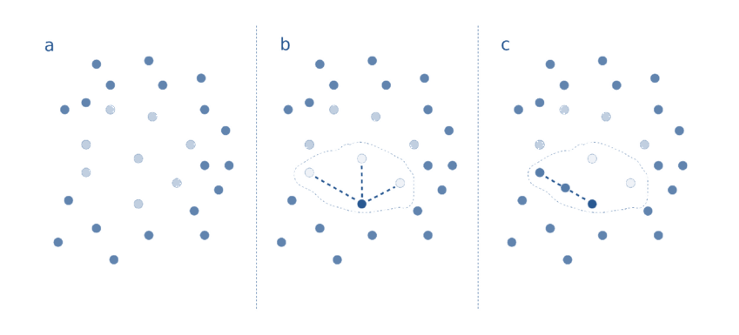

<span style="color:blue">SMOTE</span> est une technique qui est utilisée avec des données continues uniquement. Pour les données catégorielles, il existe une version adaptée appelée SMOTENC pour <span style="color:blue">SMOTE</span> <span style="color:blue">N</span>ominal <span style="color:blue">C</span>ontinous. 

<span style="color:red">ATTENTION!!</span>  SMOTE présente tout de même quelques faiblesses, quant à la logique de sur-échantillonage utilisée. D’une part, il ne prend pas en compte les exemples voisins pouvant provenir de la classe majoritaire. Les observations synthétiques créées peuvent donc se chevaucher avec d’autres observations de la classe majoritaire.
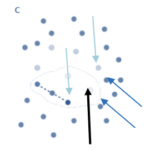

D’une autre part, la génération de plusieurs observations synthétiques risque de générer ce qui est en réalité du bruit supplémentaire dans le jeu de données, ce qui pourrait éventuellement biaiser le modèle. 

#### <a name="C512"><font color='purple'>5.1.2 ADASYN</font></a> 

ADASYN pour ADAptive SYNthetic est une version améliorée de SMOTE. Au lieu de générer le même nombre d’observations synthétiques pour chaque observation de la classe minoritaire choisie, nous allons adapter le sur-échantillonnage à la densité de distribution des observations de la classe minoritaire. Concrètement, ADASYN génère plus d’échantillons synthétiques dans les régions de l’espace des features où la densité des observations minoritaires est faible et moins d’échantillons dans les régions où la densité est plus élevée. 

### <a name="C52"><font color='purple'>5.2 SOUS-ECHANTILLONNAGE</font></a> 

#### <a name="C521"><font color='purple'>5.2.1 NearMISS</font></a> 

In [224]:
%%time
from imblearn.under_sampling import NearMiss

# Choix de la taille du nouveau dataset 
distribution_of_samples = {0:60000, 1:5600}

# Sous-Echantillonnage en utilisant la méthode NearMiss 
nearmiss = NearMiss(sampling_strategy = 'auto') #distribution_of_samples)
X_under_sample, y_under_sample = nearmiss.fit_resample(X = np.concatenate((X_train_sfs,X_test_sfs), axis=0), 
                                                     y = np.concatenate((y_train,y_test), axis=0))

2023/09/14 17:03:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f90cc067bb654625a72ef48d9a2781b8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/09/14 17:03:39 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/09/14 17:03:39 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/09/14 17:03:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


CPU times: total: 29.2 s
Wall time: 4.98 s


In [225]:
lightGBc_SelectedFeature.fit(X_under_sample, y_under_sample )
    
y_pred_proba = lightGBc_SelectedFeature.predict_proba(X_validation_sfs)
y_pred = lightGBc_SelectedFeature.predict(X_validation_sfs)

# Metrics
accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
accuracy, precision, f1, recall, auc

(0.5119221465018915,
 0.08296226376377404,
 0.150582889493091,
 0.8143001007049345,
 0.5034027943913815)

In [226]:
from imblearn.pipeline import Pipeline

#parametres NearMiss
param_test_pipeNearMiss ={
    'NearMiss__n_neighbors' : [3,5,7],
    'NearMiss__sampling_strategy' : ['auto',0.2,0.4,0.5],
    'lgb__boositng_type': ['goss', 'gbdt'],
    'lgb__objective' : ['binary'],
    'lgb__scale_pos_weight' : [10,11.3968,12],
    'lgb__max_depth': [3, 5, 9],
    'lgb__n_estimators': [500, 1000], 
    'lgb__colsample_bytree': [0.4, 0.6, 0.8],
    'lgb__subsample': [0.6, 0.8, 1],
    'lgb__learning_rate': [0.1, 0.05, 0.001]}

NMiss = NearMiss(sampling_strategy = 'auto')
lgbc = lgbmc()

pipelineNearMiss = Pipeline([('NearMiss', NMiss), ('lgb', lgbc) ])

In [228]:
%%time
grid_search_NearMiss = RandomizedSearchCV(
    estimator=pipelineNearMiss, 
    param_distributions=param_test_pipeNearMiss, 
    scoring='balanced_accuracy',
    cv=3,
    refit=True,
    random_state=0,
    verbose=0)

grid_search_NearMiss.fit( X = X_train_sfs.values, y = y_train)

2023/09/14 17:06:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '839ab0c2c22844bf850572f9dd76874f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown

2023/09/14 17:07:43 INFO mlflow.sklearn.utils: Logging the 5 best runs, 5 runs will be omitted.


CPU times: total: 15min 44s
Wall time: 1min 25s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('NearMiss', NearMiss()),
                                             ('lgb', LGBMClassifier())]),
                   param_distributions={'NearMiss__n_neighbors': [3, 5, 7],
                                        'NearMiss__sampling_strategy': ['auto',
                                                                        0.2,
                                                                        0.4,
                                                                        0.5],
                                        'lgb__boositng_type': ['goss', 'gbdt'],
                                        'lgb__colsample_bytree': [0.4, 0.6,
                                                                  0.8],
                                        'lgb__learning_rate': [0.1, 0.05,
                                                               0.001],
                                        'lgb__max_depth': [3, 5, 9],
                                        'lgb__n_estimators': [500, 1000],
                                        'lgb__objective': ['binary'],
                                        'lgb__scale_pos_weight': [10, 11.3968,
                                                                  12],
                                        'lgb__subsample': [0.6, 0.8, 1]},
                   random_state=0, scoring='balanced_accuracy')

In [229]:
grid_search_NearMiss.best_params_

{'lgb__subsample': 0.6,
 'lgb__scale_pos_weight': 10,
 'lgb__objective': 'binary',
 'lgb__n_estimators': 1000,
 'lgb__max_depth': 9,
 'lgb__learning_rate': 0.001,
 'lgb__colsample_bytree': 0.8,
 'lgb__boositng_type': 'goss',
 'NearMiss__sampling_strategy': 0.2,
 'NearMiss__n_neighbors': 7}

In [230]:
grid_search_NearMiss.best_score_

0.5843863131454482

In [231]:
y_pred = grid_search_NearMiss.predict(X_validation_sfs)
y_pred_proba = grid_search_NearMiss.predict_proba(X_validation_sfs)

# Metrics
accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
accuracy, precision, f1, recall, auc

(0.5903217422643008,
 0.10958664379965699,
 0.18672471374045801,
 0.630614300100705,
 0.6155553312403621)

2023/09/14 17:13:31 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/09/14 17:13:31 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/09/14 17:13:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


[LightGBM] [Warning] Unknown parameter: boositng_type
accuracy : 0.5904812132670882 
precision: 0.10988351570773032 
f1: 0.1869950443009461 
recall: 0.6269889224572004 
auc: 0.6158644070586184


CPU times: total: 1min 22s
Wall time: 12 s


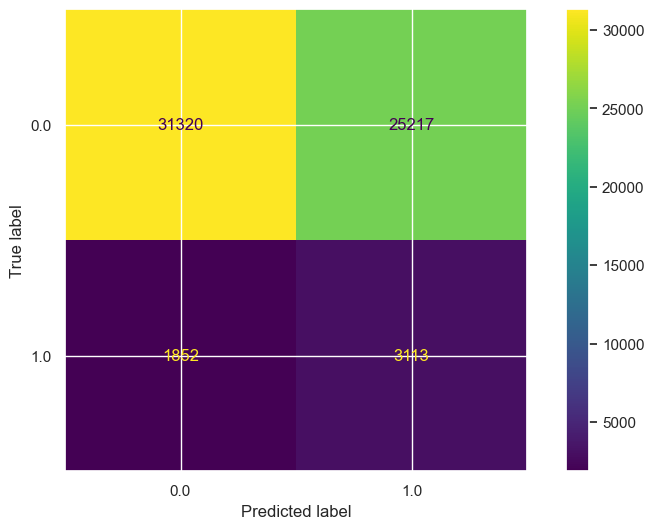

In [232]:
%%time
NMiss = NearMiss(sampling_strategy = 0.2, n_neighbors = 7)
lgbc = lgbmc(subsample=0.6, scale_pos_weight=10, objective='binary', n_estimators=1000, max_depth=9,
             learning_rate=0.001, colsample_bytree=0.8, boositng_type='goss',)

pipelineNearMiss = Pipeline([('NearMiss', NMiss), ('lgb', lgbc) ])

# Only Selected Feature from SFS
with mlflow.start_run(run_name='LightGBMC Only Selected Features NearMiss v2'): #experiment_id= experiment_id
    pipelineNearMiss.fit( X = np.concatenate((X_train_sfs,X_test_sfs), axis=0), 
                          y = np.concatenate((y_train,y_test), axis=0) )
    
    y_pred_proba = pipelineNearMiss.predict_proba(X_validation_sfs)
    y_pred = pipelineNearMiss.predict(X_validation_sfs)
    
    # Metrics
    accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
    print("accuracy : {0} \nprecision: {1} \nf1: {2} \nrecall: {3} \nauc: {4}".format(accuracy, precision, f1, recall, auc ))
    cm = ConfusionMatrixDisplay.from_predictions(y_true = y_validation, y_pred = y_pred)
    print("\n")
    # Log params
    # mlflow.log_param('max_iter' , '100')
    
    # Log metrics
    mlflow.log_metric("accuracy_test",accuracy)
    mlflow.log_metric('precision_test',precision)
    mlflow.log_metric("f1_test",f1)
    mlflow.log_metric("recall_test",recall)
    mlflow.log_metric("auc_test",auc)
    
    # Log figure
    mlflow.log_figure(cm.figure_, 'test_confusion_matrix.png')
    
    # Log model
    mlflow.sklearn.log_model(pipelineNearMiss, 'modele_LightGBMc_selected_features_NearMiss', signature=signature_SelectedFeature)

### <a name="C53"><font color='purple'>5.3 COST SENSITIVE LEARNING</font></a> 

Le Cost-Sensitive Learning peut également être une solution au problème de déséquilibre de classes. C’est un type d’apprentissage qui prend en compte les coûts d’une mauvaise classification. 

En effet, au cours de l’étape d’apprentissage, on peut attribuer des poids aux observations et le poids de chaque observation sera d’autant plus important que la classe de celle-ci est minoritaire. Le principe est de redéfinir la fonction de coût du modèle en tenant compte de ces poids. 

On rappelle que la fonction de coût est une fonction qui calcule l’erreur entre les valeurs réelles et les valeurs prédites lors de l’apprentissage, l’objectif de l’apprentissage étant d’ailleurs de trouver les paramètres du modèle qui la minimisent. 

Par exemple, pour plusieurs modèles de boosting tels que XGBoost, Light GBM ou encore Catboost, redéfinir la fonction de coût du modèle en prenant en compte la distribution des observations dans le jeu de données d’entraînement revient tout simplement à définir le paramètre scale_pos_weight. On ne s’attarde pas dans cet article sur l’aspect théorique du Cost-Sensitive Learning mais pratiquement, adopter un apprentissage « sensible au coût » se traduit par le choix de l’hyperparamètre scale_pos_weight ou ses équivalents pour d’autres modèles de ML tel le class_weight pour le SGD. 

In [233]:
lgbmc_costSensitive = lgbmc( scale_pos_weight =11.3869,objective='binary',
                            random_state = 0,importance_type = 'split' )

In [234]:
lgbmc_costSensitive.fit( X = np.concatenate((X_train_sfs,X_test_sfs), axis=0),
                         y = np.concatenate((y_train,y_test), axis=0))
    
y_pred_proba = lgbmc_costSensitive.predict_proba(X_validation_sfs)
y_pred = lgbmc_costSensitive.predict(X_validation_sfs)

# Metrics
accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
accuracy, precision, f1, recall, auc

(0.6846371083959473,
 0.1626178213973375,
 0.26202685246800017,
 0.6741188318227593,
 0.7491163634947079)

In [238]:
param_lgbm_costSensitive ={
    'boositng_type': ['goss', 'gbdt'],
    'objective' : ['binary'],
    'scale_pos_weight' : [8,10,11.3968,15],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [500, 1000], 
    'colsample_bytree': [0.4, 0.6, 0.8],
    'subsample': [0.4, 0.6, 0.8, 1],
    'learning_rate': [0.1, 0.05, 0.001]
                          }
    
grid_search_costSensitive = RandomizedSearchCV(
    estimator=lgbmc_costSensitive, 
    param_distributions=param_lgbm_costSensitive, 
    scoring='balanced_accuracy',
    cv=3,
    refit=True,
    random_state=0,
    verbose=0)

grid_search_costSensitive.fit( X = X_train_sfs.values, y = y_train )

2023/09/14 17:17:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '485d4ad6945f4df89800e57c618f0f40', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown

2023/09/14 17:18:27 INFO mlflow.sklearn.utils: Logging the 5 best runs, 5 runs will be omitted.


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(objective='binary', random_state=0,
                                            scale_pos_weight=11.3869),
                   param_distributions={'boositng_type': ['goss', 'gbdt'],
                                        'colsample_bytree': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.05, 0.001],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [500, 1000],
                                        'objective': ['binary'],
                                        'scale_pos_weight': [8, 10, 11.3968,
                                                             15],
                                        'subsample': [0.4, 0.6, 0.8, 1]},
                   random_state=0, scoring='balanced_accuracy')

In [239]:
grid_search_costSensitive.best_params_

{'subsample': 1,
 'scale_pos_weight': 10,
 'objective': 'binary',
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8,
 'boositng_type': 'gbdt'}

In [240]:
grid_search_costSensitive.best_score_

0.6729407544419921

[LightGBM] [Warning] Unknown parameter: boositng_type
accuracy : 0.6797852580423008 
precision: 0.18234165067178504 
f1: 0.27893540443265774 
recall: 0.5931520644511581 
auc: 0.7479753965538454


CPU times: total: 52.3 s
Wall time: 6.89 s


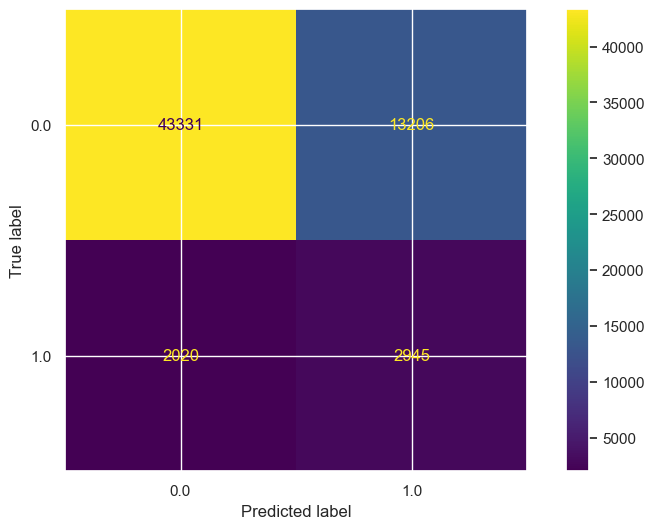

In [241]:
%%time
lgbmc_costSensitive = lgbmc( **grid_search_costSensitive.best_params_ )

# Only Selected Feature from SFS
with mlflow.start_run(run_name='LightGBMC Selected Features Cost Sensitive v2'): #experiment_id= experiment_id
    lgbmc_costSensitive.fit( X = np.concatenate((X_train_sfs,X_test_sfs), axis=0), 
                          y = np.concatenate((y_train,y_test), axis=0) )
    
    y_pred_proba = lgbmc_costSensitive.predict_proba(X_validation_sfs)
    y_pred = lgbmc_costSensitive.predict(X_validation_sfs)
    
    # Metrics
    accuracy, precision, f1, recall, auc = eval_metrics(y_validation,y_pred, y_pred_proba)
    print("accuracy : {0} \nprecision: {1} \nf1: {2} \nrecall: {3} \nauc: {4}".format(accuracy, precision, f1, recall, auc ))
    cm = ConfusionMatrixDisplay.from_predictions(y_true = y_validation, y_pred = y_pred)
    print("\n")
    # Log params
    # mlflow.log_param('max_iter' , '100')
    
    # Log metrics
    mlflow.log_metric("accuracy_test",accuracy)
    mlflow.log_metric('precision_test',precision)
    mlflow.log_metric("f1_test",f1)
    mlflow.log_metric("recall_test",recall)
    mlflow.log_metric("auc_test",auc)
    
    # Log figure
    mlflow.log_figure(cm.figure_, 'test_confusion_matrix.png')
    
    # Log model
    mlflow.sklearn.log_model(lgbmc_costSensitive, 'LGBMc selected features UnbalCostSensitive', signature=signature_SelectedFeature)

### <a name="C54"><font color='purple'>5.4 ENSEMBLE LEARNING csv</font></a> 

In [252]:
# Séparation du dataset en deux datasets différents correspondant respectivement aux 
# observations positives et négatives 
index_p = y_train[y_train == 1].index
index_n = y_train[y_train == 0].index
X_train_p = X_train_sfs.loc[(y_train == 1).values]
y_train_p = y_train.loc[index_p]
X_train_n = X_train_sfs.loc[(y_train == 0).values]
y_train_n = y_train.loc[index_n]

X_train_p = X_train_p.reset_index(drop=True)
y_train_p = y_train_p.reset_index(drop=True)
X_train_n = X_train_n.reset_index(drop=True)
y_train_n = y_train_n.reset_index(drop=True)

# Division de l'ensemble contenant les observations négatives en cinq sous-ensembles 
n_classifiers = 5
kf = KFold(n_splits=n_classifiers, random_state=0, shuffle=True)
indexes = []
for index in kf.split(X_train_n):
    indexes.append(index[1])
# Création des 5 nouveaux datasets d'entraînement    
data_X_train = []
data_y_train = []
for index in indexes:
    data_X_train.append(pd.concat([X_train_n.loc[index], X_train_p]))
    data_y_train.append(pd.concat([y_train_n.loc[index], y_train_p])) 

In [253]:
y_pred_clf=[]
y_pred_proba_clf=[]
lgb_classifier = lgbmc( **grid_search_costSensitive.best_params_ )

for i in range(len(indexes)):
    lgb_classifier = lgb_classifier.fit(data_X_train[i].values, data_y_train[i].values )
    filename = "data/modeles sauvegardés/classifier_" + str(i) +".sav"
    joblib.dump(lgb_classifier, filename)
    y_pred_clf.append(lgb_classifier.predict(X_test_sfs)) 
    y_pred_proba_clf.append(lgb_classifier.predict_proba(X_test_sfs)[:, 1])

[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type
[LightGBM] [Warning] Unknown parameter: boositng_type


In [254]:
y_pred_clf = np.transpose(y_pred_clf)
y_pred_proba_clf = np.transpose(y_pred_proba_clf)

In [255]:
from collections import Counter
y_pred = []
y_pred_proba = []
for i in range(len(y_pred_clf)):
    y_pred.append(Counter(y_pred_clf[i]).most_common(1)[0][0])
    moy = np.mean(y_pred_proba_clf[i])
    if moy < 0.5:
        y_pred_proba.append(0)
    else:
        y_pred_proba.append(1)

In [256]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

def plot_confusion_matrix(cm):
    plt.clf()
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    classNames = [0,1]
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print("L'accuracy est égale à :" + str(balanced_accuracy_score(y_test, y_pred)))
    print("La précision est égale à :" + str(precision_score(y_test, y_pred)))
    print("Le rappel est égal à :" + str(recall_score(y_test, y_pred)))
    print("Le score F1 est égal à :" + str(f1_score(y_test, y_pred)))
    print("Le score auc est égal à :" + str(roc_auc_score(y_test, y_pred)))
    print("Le MCC est égal à :" + str(matthews_corrcoef(y_test, y_pred)))

<Figure size 1000x600 with 0 Axes>

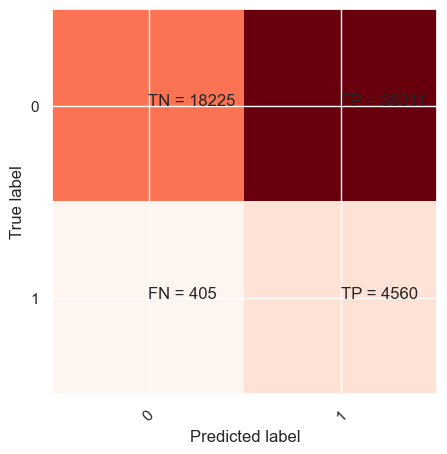

L'accuracy est égale à :0.620394988280066
La précision est égale à :0.10636560845326677
Le rappel est égal à :0.918429003021148
Le score F1 est égal à :0.19065139225687766
Le score auc est égal à :0.620394988280066
Le MCC est égal à :0.14274875711696172


In [257]:
evaluate_model(y_test,y_pred)

</br>

</br>

</br>

</br>

</br>